In [1]:
import sys
import requests
from time import sleep
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import json
import matplotlib.pyplot as plt

# Requête 

In [2]:
# Variable initialisation
N_request = 40
category = ['tiny','small','medium','large']
listCourse = []
listMissTop = []

In [3]:
def request(category, cpt, listMissTop, oldTop=None) :
    r = requests.get('http://tortues.ecoquery.os.univ-lyon1.fr:8080/'+str(category))
    r_json = r.json()
    recs = r_json['tortoises']
    df = pd.json_normalize(recs)
    if cpt == 0 :
        oldTop = df.top[0]
    if cpt != 0 :
        #print("old top : "+str(oldTop) + " et new top: "+str(df.top[0]))
        if df.top[0] != (oldTop + 1) :
            print("Rattage de top ! ")
            listMissTop.append(cpt+1)
        oldTop = df.top[0]
    df['iterration_update'] = cpt
    return df,oldTop

In [4]:
oldTop = None
repeat = True
cpt=0    
while cpt < N_request :
    print('Requete '+str(cpt+1))
    res = request('tiny',cpt,listMissTop,oldTop)
    listCourse.append(res[0])
    oldTop = res[1]
    #repeat = res[2]
    sleep(2.99)
    cpt += 1

Requete 1
Requete 2
Requete 3
Requete 4
Requete 5
Requete 6
Requete 7
Requete 8
Requete 9
Requete 10
Requete 11
Requete 12
Requete 13
Requete 14
Requete 15
Requete 16
Requete 17
Requete 18
Requete 19
Requete 20
Requete 21
Requete 22
Requete 23
Requete 24
Requete 25
Requete 26
Requete 27
Requete 28
Requete 29
Requete 30
Requete 31
Requete 32
Requete 33
Requete 34
Requete 35
Requete 36
Requete 37
Requete 38
Rattage de top ! 
Requete 39
Requete 40


# Conversion dataframe

In [5]:
df = pd.concat(listCourse)
df['vitesse'] = 0

In [6]:
df.loc[df.iterration_update == 0,'vitesse'] = -1
df.head(20)

,id,top,position,iterration_update,vitesse
0,0,169144,30507416,0,-1
1,1,169144,61821177,0,-1
2,2,169144,34098456,0,-1
3,3,169144,32689942,0,-1
4,4,169144,31494161,0,-1
5,5,169144,22664928,0,-1
6,6,169144,58354680,0,-1
7,7,169144,32863057,0,-1
8,8,169144,17743837,0,-1
9,9,169144,30326096,0,-1


In [7]:
df = df.sort_values(by=['id','top'])

In [8]:
df ['ecart_position_avec_precedent'] = df.groupby('id')['position'].diff()

In [9]:
df ['acceleration'] = df.groupby('id')['ecart_position_avec_precedent'].diff()

# Calcul des vitesses

In [10]:
df_ecart = df[df['vitesse'] != -1]
df_ecart

,id,top,position,iterration_update,vitesse,ecart_position_avec_precedent,acceleration
0,0,169145,30507438,1,0,22.0,NaN
0,0,169146,30507655,2,0,217.0,195.0
0,0,169147,30507968,3,0,313.0,96.0
0,0,169148,30508107,4,0,139.0,-174.0
0,0,169149,30508307,5,0,200.0,61.0
...,...,...,...,...,...,...,...
9,9,169179,30332914,35,0,239.0,117.0
9,9,169180,30333038,36,0,124.0,-115.0
9,9,169182,30333508,37,0,470.0,346.0
9,9,169183,30333755,38,0,247.0,-223.0


In [11]:
df_ecart = df_ecart.drop('vitesse', 1)
df_ecart

,id,top,position,iterration_update,ecart_position_avec_precedent,acceleration
0,0,169145,30507438,1,22.0,NaN
0,0,169146,30507655,2,217.0,195.0
0,0,169147,30507968,3,313.0,96.0
0,0,169148,30508107,4,139.0,-174.0
0,0,169149,30508307,5,200.0,61.0
...,...,...,...,...,...,...
9,9,169179,30332914,35,239.0,117.0
9,9,169180,30333038,36,124.0,-115.0
9,9,169182,30333508,37,470.0,346.0
9,9,169183,30333755,38,247.0,-223.0


In [12]:
df_ecart = df_ecart.loc[:,~df_ecart.columns.duplicated()]
df_ecart = df_ecart.reset_index(drop=True)
df_ecart

,id,top,position,iterration_update,ecart_position_avec_precedent,acceleration
0,0,169145,30507438,1,22.0,NaN
1,0,169146,30507655,2,217.0,195.0
2,0,169147,30507968,3,313.0,96.0
3,0,169148,30508107,4,139.0,-174.0
4,0,169149,30508307,5,200.0,61.0
...,...,...,...,...,...,...
385,9,169179,30332914,35,239.0,117.0
386,9,169180,30333038,36,124.0,-115.0
387,9,169182,30333508,37,470.0,346.0
388,9,169183,30333755,38,247.0,-223.0


In [13]:
df_join = df_ecart.groupby('id').agg(lambda x: x.tolist())

In [14]:
df_join['acceleration'].apply(lambda x : x.pop(0))

id
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
Name: acceleration, dtype: float64

In [15]:
df_join['distraite'] = None
df_join['fatigue'] = None
df_join['cyclique'] = None
df_join['regulier'] = None
df_join

,top,position,iterration_update,ecart_position_avec_precedent,acceleration,distraite,fatigue,cyclique,regulier
id,,,,,,,,,
0,"[169145, 169146, 169147, 169148, 169149, 16915...","[30507438, 30507655, 30507968, 30508107, 30508...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[22.0, 217.0, 313.0, 139.0, 200.0, 369.0, 24.0...","[195.0, 96.0, -174.0, 61.0, 169.0, -345.0, 305...",None,None,None,None
1,"[169145, 169146, 169147, 169148, 169149, 16915...","[61821546, 61821911, 61822277, 61822641, 61823...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[369.0, 365.0, 366.0, 364.0, 369.0, 369.0, 366...","[-4.0, 1.0, -2.0, 5.0, 0.0, -3.0, 3.0, 0.0, -3...",None,None,None,None
2,"[169145, 169146, 169147, 169148, 169149, 16915...","[34098548, 34098671, 34098716, 34098837, 34099...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[92.0, 123.0, 45.0, 121.0, 204.0, 388.0, 320.0...","[31.0, -78.0, 76.0, 83.0, 184.0, -68.0, -83.0,...",None,None,None,None
3,"[169145, 169146, 169147, 169148, 169149, 16915...","[32690341, 32690501, 32690520, 32690807, 32691...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[399.0, 160.0, 19.0, 287.0, 231.0, 119.0, 289....","[-239.0, -141.0, 268.0, -56.0, -112.0, 170.0, ...",None,None,None,None
4,"[169145, 169146, 169147, 169148, 169149, 16915...","[31494390, 31494629, 31494858, 31495003, 31495...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[229.0, 239.0, 229.0, 145.0, 259.0, 115.0, 230...","[10.0, -10.0, -84.0, 114.0, -144.0, 115.0, -45...",None,None,None,None
5,"[169145, 169146, 169147, 169148, 169149, 16915...","[22665024, 22665144, 22665288, 22665456, 22665...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[96.0, 120.0, 144.0, 168.0, 192.0, 216.0, 240....","[24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 4.0...",None,None,None,None
6,"[169145, 169146, 169147, 169148, 169149, 16915...","[58355025, 58355370, 58355715, 58356060, 58356...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[345.0, 345.0, 345.0, 345.0, 345.0, 345.0, 345...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",None,None,None,None
7,"[169145, 169146, 169147, 169148, 169149, 16915...","[32863083, 32863264, 32863404, 32863556, 32863...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[26.0, 181.0, 140.0, 152.0, 130.0, 75.0, 255.0...","[155.0, -41.0, 12.0, -22.0, -55.0, 180.0, -9.0...",None,None,None,None
8,"[169145, 169146, 169147, 169148, 169149, 16915...","[17743998, 17744106, 17744237, 17744322, 17744...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[161.0, 108.0, 131.0, 85.0, 49.0, 137.0, 90.0,...","[-53.0, 23.0, -46.0, -36.0, 88.0, -47.0, 73.0,...",None,None,None,None


# Visualisation 

In [16]:
listMissTop

[38]

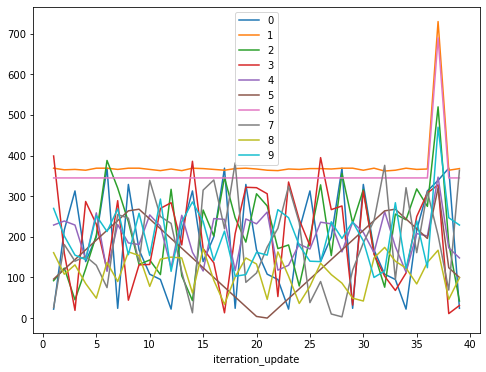

In [17]:
fig, ax = plt.subplots(figsize=(8,6))

for i, g in df.groupby('id'):
    g.plot(x='iterration_update', y='ecart_position_avec_precedent', ax=ax, label=str(i))

plt.show()

# Fonction Typage

Les tortues fatiguées s’endorment au fur et à mesure qu’elles avancent. Leur vitesse diminue à un rythme constant jusqu’à tomber à 0. Ces tortues se réveillent alors et recommencent à accélérer (au même rythme qu’elles ont ralenti) jusqu’à atteindre le vitesse initiale, puis elles recommencent alors à s’endormir. Il est possible que le rythme de (décroissance) soit différent au moment de l’arrêt de la tortue et au moment où elle termine sa réaccélération à sa vitesse de départ. On prendra la convention que les tortues fatiguées et cycliques sont considérées comme fatiguées, mais pas comme cycliques. (paramètres: vitesse initiale et rythme de (dé)croissance)

In [18]:
def detectMissTopVitesse(cpt, array_miss_top):
    for i in array_miss_top :
        if cpt == (i - 1) - 1 :
            return True
    return False
        
        
        
def detectMissTopAcceleration(cpt, array_miss_top):
    for i in array_miss_top :
        if cpt == (i - 1) - 2 :
            return True
    return False
        
        

In [19]:
# Detection des tortues régulières
def detect_regular(df_join,id) :
    # On procede pareil que dans la fonction detect_tired ici sauf que on verifie 
    # que le coefficient d'acceleration le plus frequent 0 est présent partout
    # Ici il faut prendre en consideration les possibles "ratage" de top.
    # On verifie que chaque valeur d'acceleration des tortues est égale à 0 et 
    # il faut verifier si entre deux times series qui ont une accelerations nulle
    # on a une time serie avec un point "abérrant" (outlier) qui se traduit par un "ratage" de top
    # qu'il ne faut pas prendre en consideration
    array = np.array(df_join['acceleration'][id])
    print(array)
    n = len(array)
    freq_array = []
    array_abs = np.absolute(array)
    unique_elements, counts_elements = np.unique(array_abs, return_counts=True)
    value_count = np.asarray((unique_elements, counts_elements))
    for freq in value_count[1] :
        freq_array.append(freq / n)
    max_freq = np.array(freq_array).max()
    index = np.argmax(freq_array)
    value = unique_elements[index]
    print(value)
    # Si la valeur la plus fréquente est  0 alors c'est potentiellement une tortue réguliere
    if value == 0 :
         
        cpt = 0
        print(array_abs)
        for e in array_abs :
            # Si on rate le top entre deux requêtes on prends pas l'acceleration de cette time serie en consideration
            # Donc on verifie si ya un "ratage" de top
            #print(str(array_abs[cpt])+" et "+ str(array_abs[cpt+1]))
            if e != 0 :
                if array_abs[cpt] == array_abs[cpt-1] or array_abs[cpt] == array_abs[cpt+1] :
                    cpt += 1
                    continue
                # Sinon ce n'est pas une tortue réguliere
                else:
                    return False
            # Sinon on verifie que l'acceleration est égale a zero
            elif e == 0 :
                index_vitesse = cpt
                cpt += 1
                continue
            
        return True,np.array(df_join['ecart_position_avec_precedent'][id])[index_vitesse]
    else :
        return False

In [20]:
def detect_cycle(df_join,id, array_miss_top):
    check_acceleration = np.array(df_join['acceleration'][id])
    freq_array = []
    unique_elements, counts_elements = np.unique(check_acceleration, return_counts=True)
    value_count = np.asarray((unique_elements, counts_elements))
    for freq in value_count[1] :
        freq_array.append(freq / len(check_acceleration))
    max_freq = np.array(freq_array).max()
    index = np.argmax(freq_array)
    value = unique_elements[index]
    
    # On regarde si la tortue est réguliere avant de betement commencer à chercher un cycle
    if value == 0 :
        return False

    array = np.array(df_join['ecart_position_avec_precedent'][id])
    potential_cycle = False
    test_cycle = False
    visited = []
    current_cycle = []
    cycle = []
    count_cycle = 0
    cpt_current_cycle = 0
    cpt_current_element = 0
    cpt_miss_top = 0
    len_cycle = 0
    index_tab_vitesse_initial = 0
    for e in array :
        # Premier cas on append simplement :
        if cpt_current_element == 0 :
            cpt_current_cycle += 1
            current_cycle.append(e)
            visited.append(e)
            cpt_current_element += 1
        
        else :
            # Si on a pas de cycle potentiel et qu'on detect un ratage de top, on reset le cycle
            
            if cpt_miss_top > 0 :
                cpt_miss_top -= 1
                
            
            elif detectMissTopVitesse(cpt_current_element,array_miss_top) and potential_cycle == False :
                print('if 1')
                #print(cpt_current_element)
                cpt_current_cycle = 0
                index_tab_vitesse_initial = cpt_current_element
                current_cycle = []
                cpt_miss_top += 2
                
            
            # Si on a pas encore de cycle potentiel et qu'on retombe sur le premier element du cycle courant
            # Alors on on a un cycle potentiel
            elif len(current_cycle) > 0 and e == current_cycle[0] and potential_cycle == False and len(current_cycle) > 1 and e != current_cycle[cpt_current_cycle-1] :
                print('if 2')
                potential_cycle = True
                visited.append(e)
                cpt_current_element + 1
                len_cycle = cpt_current_cycle
                cycle = current_cycle
                print('cycle potentiel:'+str(cycle))
                print("longueur: " + str(len_cycle))
                #print(visited)
            
            # Si on a pas de cycle potentiel, il faut comparer la fin des elements du tableau avec
            # le cycle potentiel constitué. Il faut adapter un compteur pour les indices du cycles potentiels
            elif potential_cycle == True :
                
                if cpt_current_cycle == len_cycle and test_cycle == False :
                    cpt_current_cycle = 1 
                    test_cycle = True
                elif cpt_current_cycle == len_cycle and test_cycle == True : 
                    cpt_current_cycle = 0
                    current_cycle = []
                elif cpt_current_cycle > len_cycle : 
                    cpt_current_cycle -= len_cycle
                
                #print(str(cycle[cpt_current_cycle]) + ' et element acceleration '+str(e))
                if detectMissTopVitesse(cpt_current_element,array_miss_top):
                    
                    cpt_current_cycle += 2
                    
                elif cycle[cpt_current_cycle] == e :
                    #print('suis le cycle')
                    cpt_current_cycle += 1
                else :
                    return False

            else :
                cpt_current_cycle += 1
                current_cycle.append(e)
                visited.append(e)
            print(current_cycle)
            cpt_current_element += 1
        #print(cpt_current_element)
    if test_cycle == True :
        return True,df_join['ecart_position_avec_precedent'][id][index_tab_vitesse_initial:(index_tab_vitesse_initial+len_cycle)]
    else :
        return False

In [21]:
import heapq

# Detection des tortues endormies
def detect_tired(df_join,id,array_miss_top):
    array = np.array(df_join['acceleration'][id])
    # On converti les valeurs d'acceleration en valeur absolu pour les conditionner aux regles de rythmes des tortues
    # Par rapport aux valeurs de cycles attendus pour l'acceleration
    n = len(array)
    freq_array = []
    array_abs = np.absolute(array)
    unique_elements, counts_elements = np.unique(array_abs, return_counts=True)
    value_count = np.asarray((unique_elements, counts_elements))
    # On recupere les frequences pour toutes les accelerations 
    for freq in value_count[1] :
        freq_array.append(freq / n)
    max_freq = np.array(freq_array).max()
    # On regarde quelle est l'acceleration la plus significative en terme de ratio et on l'a stocke dans value
    index = np.argmax(freq_array)
    second_index = np.array(freq_array).argsort()[-2]
    # Sauvegarde de la vitesse initiale
    #print(second_index)
    acceleration_initiale = unique_elements[second_index]
    #print(df['ecart_position_avec_precedent'][id])
    index_vitesse_initiale = (list(array_abs).index(acceleration_initiale))
    vitesse_initiale = np.array(df_join['ecart_position_avec_precedent'][id][0])
    cpt_miss = 0
    value = unique_elements[index]
    #print(value)
    # Si la tortue n'est pas reguliere alors c'est potentiellement une tortue endormie
    if value != 0: 
        cpt = 0
        # on regarde que les times series enregistrés vérifient les conditions des tortues endormies
        for e in array_abs :
            # Si notre premiere valeur est un miss ou un ajustement
            print(str(e)+" et "+str(value))
            
            if detectMissTopAcceleration(cpt,array_miss_top) : 
                cpt_miss = 1
                cpt += 1
                print('miss detected')
            
            elif cpt_miss > 0 :
                cpt_miss -= 1
                cpt +=1
            
            elif e != value and cpt == 0 :
                if array_abs[cpt+1] == value:
                    cpt += 1
                    continue
                
            # Si on tombe tout le temps sur le coefficient d'acceleration enregistré comme le plus frequente on continue
            elif e == value :
                cpt += 1
                continue
            
            # Si ce n'est pas la premiere valeur et que la valeur absolue de la valeur d'acceleration au top avant (n-1)
            # Est égale a la valeur absolue de la valeur d'acceleration au top apres (n+1)
            # Alors c'est un ratage de top et donc ce n'est pas a prendre en consideration
            # Le top courant
            elif cpt > 0 and e != value :
                
                
                #S'il ya ratage de top, on verifie avec les valeurs d'avant et d'apres
                if array_abs[cpt-1] == value or array_abs[cpt-3] == value:
                    
                    #print('ratage de top')
                    cpt += 1
                    continue
                
                   
                
                else :
                    return False
            
            # Sinon ce n'est pas une tortue endormie
            else :
                return False
        # l'ensemble des accelerations enregistrés respectent les conditions d'accelerations des tortues endormies
        return True,vitesse_initiale
    else :
        # Sinon c'est pas une tortue endormie
        return False


In [22]:
df_join['ecart_position_avec_precedent'][0][0]

22.0

In [23]:
def detect_distraite(df_join,id) :
    if df_join['fatigue'][id] == False :
        if df_join['regulier'][id] == False :
            if df_join['cyclique'][id] == False :
                min_vitesse = np.array(df_join['ecart_position_avec_precedent'][id]).min()
                max_vitesse = np.array(df_join['ecart_position_avec_precedent'][id]).max()
                
                return True,min_vitesse,max_vitesse
    return False


In [24]:
listMissTop

[38]

# Detection des tortues

In [25]:
df_join = df_join.reset_index()

In [26]:
def analyse_detection(df_join):
    array_id = df_join['id'].unique()
    for i in array_id :
        df_join['fatigue'][i] = detect_tired(df_join, i,listMissTop)
        df_join['regulier'][i] = detect_regular(df_join, i)
        df_join['cyclique'][i] = detect_cycle(df_join,i,listMissTop)
        df_join['distraite'][i] = detect_distraite(df_join,i)
    # on verifie pour les endormies et cycliques 
    
    
    for i in array_id :
        if df_join['cyclique'][i] != False and df_join['fatigue'][i] != False :
            print("id concerné :"+str(i))
            df_join['cyclique'][i] = False

    return df_join

In [27]:
df_resultat = analyse_detection(df_join)

195.0 et 96.0
96.0 et 96.0
174.0 et 96.0
61.0 et 96.0
[ 195.   96. -174.   61.  169. -345.  305. -161.  -60.  -13.  -73.  195.
   96. -174.   61.  169. -345.  305. -161.  -60.  -13.  -73.  195.   96.
 -174.   61.  169. -345.  305. -161.  -60.  -13.  -73.  195.   96.   26.
   30. -345.]
96.0
[22.0, 217.0]
[22.0, 217.0, 313.0]
[22.0, 217.0, 313.0, 139.0]
[22.0, 217.0, 313.0, 139.0, 200.0]
[22.0, 217.0, 313.0, 139.0, 200.0, 369.0]
[22.0, 217.0, 313.0, 139.0, 200.0, 369.0, 24.0]
[22.0, 217.0, 313.0, 139.0, 200.0, 369.0, 24.0, 329.0]
[22.0, 217.0, 313.0, 139.0, 200.0, 369.0, 24.0, 329.0, 168.0]
[22.0, 217.0, 313.0, 139.0, 200.0, 369.0, 24.0, 329.0, 168.0, 108.0]
[22.0, 217.0, 313.0, 139.0, 200.0, 369.0, 24.0, 329.0, 168.0, 108.0, 95.0]
if 2
cycle potentiel:[22.0, 217.0, 313.0, 139.0, 200.0, 369.0, 24.0, 329.0, 168.0, 108.0, 95.0]
longueur: 11
[22.0, 217.0, 313.0, 139.0, 200.0, 369.0, 24.0, 329.0, 168.0, 108.0, 95.0]
[22.0, 217.0, 313.0, 139.0, 200.0, 369.0, 24.0, 329.0, 168.0, 108.0, 95.0]


<ipython-input-26-b1eee32af9ee>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_join['fatigue'][i] = detect_tired(df_join, i,listMissTop)
<ipython-input-26-b1eee32af9ee>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_join['regulier'][i] = detect_regular(df_join, i)
<ipython-input-26-b1eee32af9ee>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_join['cyclique'][i] = detect_cycle(df_join,i,listMissTop)
<ipython-input-26-b1ee

In [28]:
df_resultat

,id,top,position,iterration_update,ecart_position_avec_precedent,acceleration,distraite,fatigue,cyclique,regulier
0,0,"[169145, 169146, 169147, 169148, 169149, 16915...","[30507438, 30507655, 30507968, 30508107, 30508...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[22.0, 217.0, 313.0, 139.0, 200.0, 369.0, 24.0...","[195.0, 96.0, -174.0, 61.0, 169.0, -345.0, 305...",False,False,"(True, [22.0, 217.0, 313.0, 139.0, 200.0, 369....",False
1,1,"[169145, 169146, 169147, 169148, 169149, 16915...","[61821546, 61821911, 61822277, 61822641, 61823...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[369.0, 365.0, 366.0, 364.0, 369.0, 369.0, 366...","[-4.0, 1.0, -2.0, 5.0, 0.0, -3.0, 3.0, 0.0, -3...","(True, 362.0, 730.0)",False,False,False
2,2,"[169145, 169146, 169147, 169148, 169149, 16915...","[34098548, 34098671, 34098716, 34098837, 34099...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[92.0, 123.0, 45.0, 121.0, 204.0, 388.0, 320.0...","[31.0, -78.0, 76.0, 83.0, 184.0, -68.0, -83.0,...","(True, 42.0, 520.0)",False,False,False
3,3,"[169145, 169146, 169147, 169148, 169149, 16915...","[32690341, 32690501, 32690520, 32690807, 32691...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[399.0, 160.0, 19.0, 287.0, 231.0, 119.0, 289....","[-239.0, -141.0, 268.0, -56.0, -112.0, 170.0, ...","(True, 11.0, 399.0)",False,False,False
4,4,"[169145, 169146, 169147, 169148, 169149, 16915...","[31494390, 31494629, 31494858, 31495003, 31495...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[229.0, 239.0, 229.0, 145.0, 259.0, 115.0, 230...","[10.0, -10.0, -84.0, 114.0, -144.0, 115.0, -45...","(True, 113.0, 347.0)",False,False,False
5,5,"[169145, 169146, 169147, 169148, 169149, 16915...","[22665024, 22665144, 22665288, 22665456, 22665...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[96.0, 120.0, 144.0, 168.0, 192.0, 216.0, 240....","[24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 4.0...",False,"(True, 96.0)",False,False
6,6,"[169145, 169146, 169147, 169148, 169149, 16915...","[58355025, 58355370, 58355715, 58356060, 58356...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[345.0, 345.0, 345.0, 345.0, 345.0, 345.0, 345...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False,False,False,"(True, 345.0)"
7,7,"[169145, 169146, 169147, 169148, 169149, 16915...","[32863083, 32863264, 32863404, 32863556, 32863...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[26.0, 181.0, 140.0, 152.0, 130.0, 75.0, 255.0...","[155.0, -41.0, 12.0, -22.0, -55.0, 180.0, -9.0...","(True, 3.0, 382.0)",False,False,False
8,8,"[169145, 169146, 169147, 169148, 169149, 16915...","[17743998, 17744106, 17744237, 17744322, 17744...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[161.0, 108.0, 131.0, 85.0, 49.0, 137.0, 90.0,...","[-53.0, 23.0, -46.0, -36.0, 88.0, -47.0, 73.0,...","(True, 34.0, 174.0)",False,False,False
9,9,"[169145, 169146, 169147, 169148, 169149, 16915...","[30326366, 30326568, 30326723, 30326867, 30327...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[270.0, 202.0, 155.0, 144.0, 252.0, 213.0, 269...","[-68.0, -47.0, -11.0, 108.0, -39.0, 56.0, -113...","(True, 100.0, 470.0)",False,False,False


In [29]:
df_resultat.iloc[:,6:].to_csv("resultat.csv", encoding='utf-8')

In [30]:
df_resultat.iloc[:,6:].reset_index()

,index,distraite,fatigue,cyclique,regulier
0,0,False,False,"(True, [22.0, 217.0, 313.0, 139.0, 200.0, 369....",False
1,1,"(True, 362.0, 730.0)",False,False,False
2,2,"(True, 42.0, 520.0)",False,False,False
3,3,"(True, 11.0, 399.0)",False,False,False
4,4,"(True, 113.0, 347.0)",False,False,False
5,5,False,"(True, 96.0)",False,False
6,6,False,False,False,"(True, 345.0)"
7,7,"(True, 3.0, 382.0)",False,False,False
8,8,"(True, 34.0, 174.0)",False,False,False
9,9,"(True, 100.0, 470.0)",False,False,False


In [31]:
df_resultat.to_csv("dataframe_apres_traitement.csv",encoding="utf-8")